In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Thu nhập dữ liệu

In [2]:
vn_house_df = pd.read_csv('VN_housing_dataset.csv')
vn_house_df

,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,1.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2.0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,3.0,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,4.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82492,82492.0,2019-08-07,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,50 m²,NaN,NaN,292 triệu/m²
82493,82493.0,2019-08-07,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,4 phòng,41 m²,NaN,NaN,"341,46 triệu/m²"
82494,82494.0,2019-08-05,"Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà ngõ, hẻm",Đã có sổ,NaN,4 phòng,60 m²,NaN,NaN,"101,67 triệu/m²"
82495,82495.0,2019-08-05,"Đường Hồ Tùng Mậu, Phường Mai Dịch, Quận Cầu G...",Quận Cầu Giấy,Phường Mai Dịch,Nhà phố liền kề,NaN,NaN,4 phòng,45 m²,NaN,NaN,"102,22 triệu/m²"


### Có bao nhiêu dòng cột? Có dòng nào bị lặp không ?

In [3]:
vn_house_df.shape

(82497, 13)

In [4]:
have_duplicated_rows = vn_house_df.duplicated().any()
have_duplicated_rows

False

## Khám phá dữ liệu

In [5]:
vn_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82497 entries, 0 to 82496
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       82496 non-null  float64
 1   Ngày             82496 non-null  object 
 2   Địa chỉ          82449 non-null  object 
 3   Quận             82495 non-null  object 
 4   Huyện            82449 non-null  object 
 5   Loại hình nhà ở  82465 non-null  object 
 6   Giấy tờ pháp lý  53610 non-null  object 
 7   Số tầng          36399 non-null  object 
 8   Số phòng ngủ     82458 non-null  object 
 9   Diện tích        82495 non-null  object 
 10  Dài              19827 non-null  object 
 11  Rộng             35445 non-null  object 
 12  Giá/m2           82484 non-null  object 
dtypes: float64(1), object(12)
memory usage: 8.2+ MB


In [6]:
vn_house_df.nunique()

Unnamed: 0         82496
Ngày                 174
Địa chỉ            13957
Quận                  29
Huyện                309
Loại hình nhà ở        4
Giấy tờ pháp lý        3
Số tầng               29
Số phòng ngủ          11
Diện tích            504
Dài                  487
Rộng                 410
Giá/m2              8345
dtype: int64

Như vậy, ta có thể nhận định được các cột categorical và numerical một cách dễ dàng.

In [7]:
categorical_cols = ['Loại hình nhà ở','Giấy tờ pháp lý']
numerical_cols = ['Số tầng','Số phòng ngủ','Diện tích','Dài','Rộng','Giá/m2']

Lưu ý:
- Cột Ngày ta sẽ không xét bởi vì không có giá trị thực tiễn.
- Cột Quận, Huyện cũng không xét bởi vì thực chất Quận với Huyện đã nằm ở trong cột Địa Chỉ.
- Cột Dài, Rộng không xét bởi vì cột Diện tích = Dài x Rộng.

## Tiền xử lý dữ liệu

Nhìn vào dữ liệu, ta cần lưu ý vài thứ như sau:
- Ta đang xét tập dữ liệu về nhà ở có các biến về thông tin ngôi nhà mà những nhà này không được gắn id hoặc bất cứ biến nào phù hợp để phân biệt ngoại trừ địa chỉ. Vì thế, cột Ngày không có giá trị trực quan cũng như phân tích. Ta sẽ bỏ cột này.
- Nếu nhìn sâu một chút, cột Quận Huyện đã nằm bên trong cột địa chỉ bởi vì địa chỉ được ghi một cách đầy đủ theo quy định ở nước ta nên ta sẽ bỏ luôn hai cột Quận, Huyện.
- Cột Diện tích thực chất là tích của hai cột Dài và Rộng. Như vậy, ta cân nhắc bỏ hai cột này.

In [8]:
removed_cols = ['Unnamed: 0','Ngày','Quận','Huyện','Dài','Rộng']
vn_house_df.drop(columns=removed_cols,inplace=True)
vn_house_df

,Địa chỉ,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá/m2
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...","Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,"86,96 triệu/m²"
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...","Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,"116,22 triệu/m²"
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...","Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,65 triệu/m²
3,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...","Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,100 triệu/m²
4,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...","Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,"86,11 triệu/m²"
...,...,...,...,...,...,...,...
82492,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...","Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,50 m²,292 triệu/m²
82493,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...","Nhà mặt phố, mặt tiền",Đã có sổ,NaN,4 phòng,41 m²,"341,46 triệu/m²"
82494,"Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy...","Nhà ngõ, hẻm",Đã có sổ,NaN,4 phòng,60 m²,"101,67 triệu/m²"
82495,"Đường Hồ Tùng Mậu, Phường Mai Dịch, Quận Cầu G...",Nhà phố liền kề,NaN,NaN,4 phòng,45 m²,"102,22 triệu/m²"


Ta sẽ cập nhật lại numerical_cols

In [9]:
numerical_cols = ['Số tầng','Số phòng ngủ','Diện tích','Giá/m2']

Tiếp theo, ta cần đổi các dạng dữ liệu ở các cột numerical sang số thay vì object. Ví dụ, cột "Số phòng ngủ" dư chữ phòng, ta sẽ muốn giữ lại số thôi. Tương tự với "Diện tích" và "Giá/m2" loại bỏ các đơn vị đo không cần thiết.

Tuy nhiên, ta có các giá trị như đ/m2, tỷ/m2, ta sẽ bỏ qua các giá trị này bởi vì phần lớn dữ liệu tập trung ở triệu/m2.

Ta vẫn có thể chuyển đổi giá trị tuy nhiên có thể khiến dữ liệu xuất hiện các outlier bởi vì tỷ/m2 quá lớn trong khi đ/m2 quá nhỏ.

In [10]:
vn_house_df = vn_house_df[vn_house_df['Giá/m2'].str.contains('triệu/m²') == True]
vn_house_df

,Địa chỉ,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá/m2
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...","Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,"86,96 triệu/m²"
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...","Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,"116,22 triệu/m²"
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...","Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,65 triệu/m²
3,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...","Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,100 triệu/m²
4,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...","Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,"86,11 triệu/m²"
...,...,...,...,...,...,...,...
82491,"Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc ...",Nhà phố liền kề,NaN,NaN,3 phòng,38 m²,"81,58 triệu/m²"
82492,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...","Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,50 m²,292 triệu/m²
82493,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...","Nhà mặt phố, mặt tiền",Đã có sổ,NaN,4 phòng,41 m²,"341,46 triệu/m²"
82494,"Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy...","Nhà ngõ, hẻm",Đã có sổ,NaN,4 phòng,60 m²,"101,67 triệu/m²"


In [11]:
def remove(x):
    floor = "Nhiều hơn 10"
    room = "phòng"
    other_room = "nhiều hơn 10 phòng"
    meter = "m²"
    milion_meter = " triệu/m²"
    if floor in x:
        x = int(x.replace(floor,'11'))
    elif other_room in x:
        x = 11
    elif room in x:
        x = int(x.replace(room,""))
    elif milion_meter in x:
        x = x.replace(",","")
        x = float((x.replace(milion_meter,"")))
    elif meter in x:
        x = float(x.replace(meter,""))
    return x

In [12]:
modified_cols = ['Số tầng','Số phòng ngủ','Diện tích','Giá/m2']
for col in modified_cols:
    data = vn_house_df[col].dropna()
    vn_house_df[col] = data.apply(remove)
vn_house_df['Số tầng'] = pd.to_numeric(vn_house_df['Số tầng'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
vn_house_df

,Địa chỉ,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá/m2
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...","Nhà ngõ, hẻm",Đã có sổ,4.0,5.0,46.0,8696.0
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...","Nhà mặt phố, mặt tiền",NaN,NaN,3.0,37.0,11622.0
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...","Nhà ngõ, hẻm",Đã có sổ,4.0,4.0,40.0,65.0
3,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...","Nhà ngõ, hẻm",Đã có sổ,NaN,6.0,51.0,100.0
4,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...","Nhà ngõ, hẻm",NaN,NaN,4.0,36.0,8611.0
...,...,...,...,...,...,...,...
82491,"Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc ...",Nhà phố liền kề,NaN,NaN,3.0,38.0,8158.0
82492,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...","Nhà mặt phố, mặt tiền",NaN,NaN,3.0,50.0,292.0
82493,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...","Nhà mặt phố, mặt tiền",Đã có sổ,NaN,4.0,41.0,34146.0
82494,"Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy...","Nhà ngõ, hẻm",Đã có sổ,NaN,4.0,60.0,10167.0


Tiền xử lý hoàn thành

## Thống kê mô tả

### Võ Trần Quang Tuấn

Chúng ta sẽ thống kê các đại lượng trong thống kê mô tả như sau:
* Giá trị trung bình: mean
* Độ lệch chuẩn: std
* Giá trị nhỏ nhất: min
* Tứ phân vị thứ nhất: Q1
* Tứ phân vị thứ hai: Q2, hay còn gọi là trung vị: median
* Tứ phân vị thứ ba: Q3
* Giá trị lớn nhất: max

In [14]:
vn_house_df.describe()

,Số tầng,Số phòng ngủ,Diện tích,Giá/m2
count,36051.000000,81588.000000,81626.000000,81626.000000
mean,4.461735,3.880166,47.732516,7391.390746
std,1.555215,1.495723,63.173632,6828.196694
min,1.000000,1.000000,2.000000,1.000000
25%,4.000000,3.000000,34.000000,925.000000
50%,5.000000,4.000000,40.000000,7657.000000
75%,5.000000,4.000000,50.000000,9848.000000
max,73.000000,11.000000,10360.000000,98361.000000


Trực quan hóa cho thuộc tính "Số phòng ngủ" thông qua biểu đồ hộp và rút ra các thông số thống kê

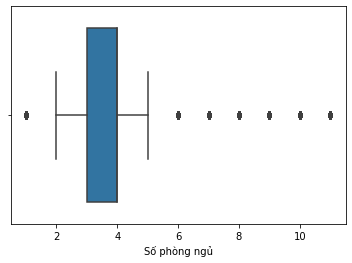

In [15]:
sns.boxplot(x='Số phòng ngủ', data=vn_house_df)

* mean = 3.880166
* std = 1.495723
* min = 1.000000
* Q1 = 3.000000
* Q2 = median = 4.000000
* Q3 = 4.000000
* max = 11.000000

Trực quan hóa cho thuộc tính "Số tầng" thông qua biểu đồ hộp và rút ra các thông số thống kê

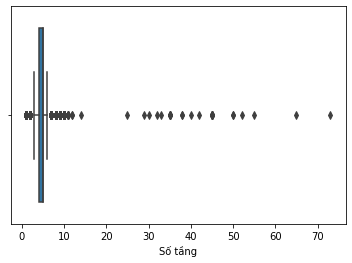

In [16]:
sns.boxplot(x='Số tầng', data=vn_house_df)

* mean = 4.461735
* std = 1.555215	
* min = 1.000000
* Q1 = 4.000000
* Q2 = median = 4.000000
* Q3 = 5.000000
* max = 73.000000

Trực quan hóa cho thuộc tính "Diện tích" thông qua biểu đồ hộp và rút ra các thông số thống kê

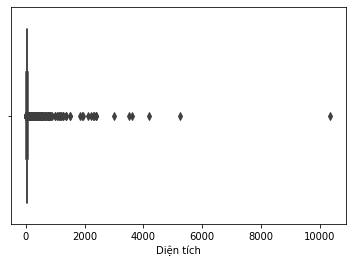

In [17]:
sns.boxplot(x='Diện tích', data=vn_house_df)

* mean = 47.732516
* std = 63.173632	
* min = 2.000000
* Q1 = 34.000000
* Q2 = median = 40.000000
* Q3 = 50.000000
* max = 10360.000000

Trực quan hóa cho thuộc tính "Giá/m2" thông qua biểu đồ hộp và rút ra các thông số thống kê

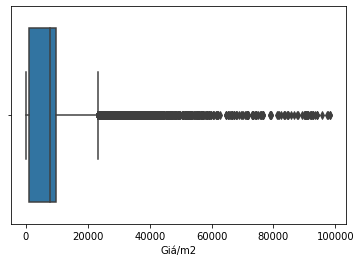

In [18]:
sns.boxplot(x='Giá/m2', data=vn_house_df)

* mean = 7391.390746
* std = 6828.196694
* min = 1.000000
* Q1 = 925.000000
* Q2 = median = 7657.000000
* Q3 = 9848.000000
* max = 98361.000000

## Phân tích dữ liệu

### Trương Chí Toàn

### Với mỗi cột numerical, dữ liệu được phân bố như thế nào?

In [19]:
def missing_ratio(col):
    return col.isna().mean() * 100
nume_col_profiles_df = vn_house_df[numerical_cols].agg([missing_ratio,pd.Series.min,pd.Series.max])
nume_col_profiles_df

,Số tầng,Số phòng ngủ,Diện tích,Giá/m2
missing_ratio,55.833925,0.046554,0.0,0.0
min,1.000000,1.000000,2.0,1.0
max,73.000000,11.000000,10360.0,98361.0


Như ta thấy, số lượng min max của mỗi cột đều khá hợp lý, nên ta sẽ xét lượng missing_ratio

Cột diện tích và Giá/m2 không bị thiếu dữ liệu. Số phòng ngủ thì chỉ thiếu khoảng 0.05%, không đáng kể. Điều bất thường ở đây là số tầng thì lại thiếu tới 55,8% tới hơn 1 nửa tổng dữ liệu. Khá là kỳ lạ

Ở đây ta sẽ thực hiện 2 việc:
- Bỏ những dòng giá trị nan ở cột số phòng ngủ
- Thay giá trị nan ở cột số tầng thành 0.

In [20]:
vn_house_df.dropna(subset=['Số phòng ngủ'], how='all', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [21]:
vn_house_df['Số tầng'] = vn_house_df['Số tầng'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Giờ ta hãy kiểm tra lại missing ratio

In [22]:
nume_col_profiles_df = vn_house_df[numerical_cols].agg([missing_ratio])
nume_col_profiles_df

,Số tầng,Số phòng ngủ,Diện tích,Giá/m2
missing_ratio,0.0,0.0,0.0,0.0


### Với mỗi cột categorical, dữ liệu được phân bố như thế nào?

In [23]:
def num_diff_vals(col):
    return len(col.value_counts())
def diff_vals(col):
    return col.value_counts().index.unique().to_numpy()

cate_col_profiles_df = vn_house_df[categorical_cols].agg([missing_ratio,num_diff_vals,diff_vals])
cate_col_profiles_df

,Loại hình nhà ở,Giấy tờ pháp lý
missing_ratio,0.023288,35.081139
num_diff_vals,4,3
diff_vals,"[Nhà ngõ, hẻm, Nhà mặt phố, mặt tiền, Nhà phố ...","[Đã có sổ, Đang chờ sổ, Giấy tờ khác]"


Loại hình nhà ở có 4 giá trị khác nhau là Nhà ngõ, hẻm, Nhà mặt phố, mặt tiền, Nhà phố liền kề.

Giấy tờ pháp lý có 3 giá trị khác nhau là Đã có sổ, Đang chờ sổ, Giấy tờ khác

Xét về missing ratio thì loại hình nhà ở chỉ thiếu khoảng 0.03%, không đáng kể, trong khi giấy tờ pháp lý thì lại thiếu tới 35%. Chứng tỏ khoảng 1/3 hộ gia đình thiếu hoặc không khai báo giấy tờ nhà của hộ.

Ở đây ta sẽ thực hiện 2 việc:
- Bỏ những dòng giá trị nan ở cột loại hình nhà ở
- Thay giá trị nan ở cột giấy tờ pháp lý thành chưa có giấy tờ

In [24]:
vn_house_df.dropna(subset=['Loại hình nhà ở'], how='all', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [25]:
vn_house_df['Giấy tờ pháp lý'] = vn_house_df['Giấy tờ pháp lý'].fillna('Chưa có giấy tờ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
cate_col_profiles_df = vn_house_df[categorical_cols].agg([missing_ratio,num_diff_vals,diff_vals])
cate_col_profiles_df

,Loại hình nhà ở,Giấy tờ pháp lý
missing_ratio,0.0,0.0
num_diff_vals,4,4
diff_vals,"[Nhà ngõ, hẻm, Nhà mặt phố, mặt tiền, Nhà phố ...","[Đã có sổ, Chưa có giấy tờ, Đang chờ sổ, Giấy ..."


## Phân tích hồi quy, dự báo

### Trần Quỳnh Như

## Thay đổi tên các cột thành tiếng Anh

In [27]:
vn_house_df2 = pd.DataFrame()

Chọn ra những trường dữ liệu cần thiết cho việc hồi qui

In [28]:
vn_house_df2['Price'] = vn_house_df['Giá/m2']
vn_house_df2['Type'] = vn_house_df['Loại hình nhà ở'] 
vn_house_df2['Bedrooms'] = vn_house_df['Số phòng ngủ']
vn_house_df2['Area'] = vn_house_df['Diện tích']
vn_house_df2['Floors'] = vn_house_df['Số tầng']
vn_house_df2.head()

,Price,Type,Bedrooms,Area,Floors
0,8696.0,"Nhà ngõ, hẻm",5.0,46.0,4.0
1,11622.0,"Nhà mặt phố, mặt tiền",3.0,37.0,0.0
2,65.0,"Nhà ngõ, hẻm",4.0,40.0,4.0
3,100.0,"Nhà ngõ, hẻm",6.0,51.0,0.0
4,8611.0,"Nhà ngõ, hẻm",4.0,36.0,0.0


## Mô hình hồi qui với Price ~ Bedrooms + Area

In [29]:
res = smf.ols(formula='Price ~ Bedrooms + Area', data=vn_house_df2).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1194.
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:26:54   Log-Likelihood:            -8.3471e+05
No. Observations:               81569   AIC:                         1.669e+06
Df Residuals:                   81566   BIC:                         1.669e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4379.8017     66.136     66.224      0.0

# Nhận xét các giá trị quan trọng của Summary

* `R-squared` và `Adj. R-squared` có giá trị 0.028 **> 0**
* `Coefficient`: các giá trị đều **dương**
    * `Intercept`: 4379.8017 -> Hệ số tự do **b** (trong công thức **y = ax + b**) ảnh hưởng lớn đến Price
    * `Bedrooms`: 758.9257 -> Số lượng phòng ngủ ảnh hưởng khá lớn đến Price
    * `Area`: 1.4156 -> Diện tích có ảnh hưởng ít đến Price

## Trực quan mô hình hồi qui

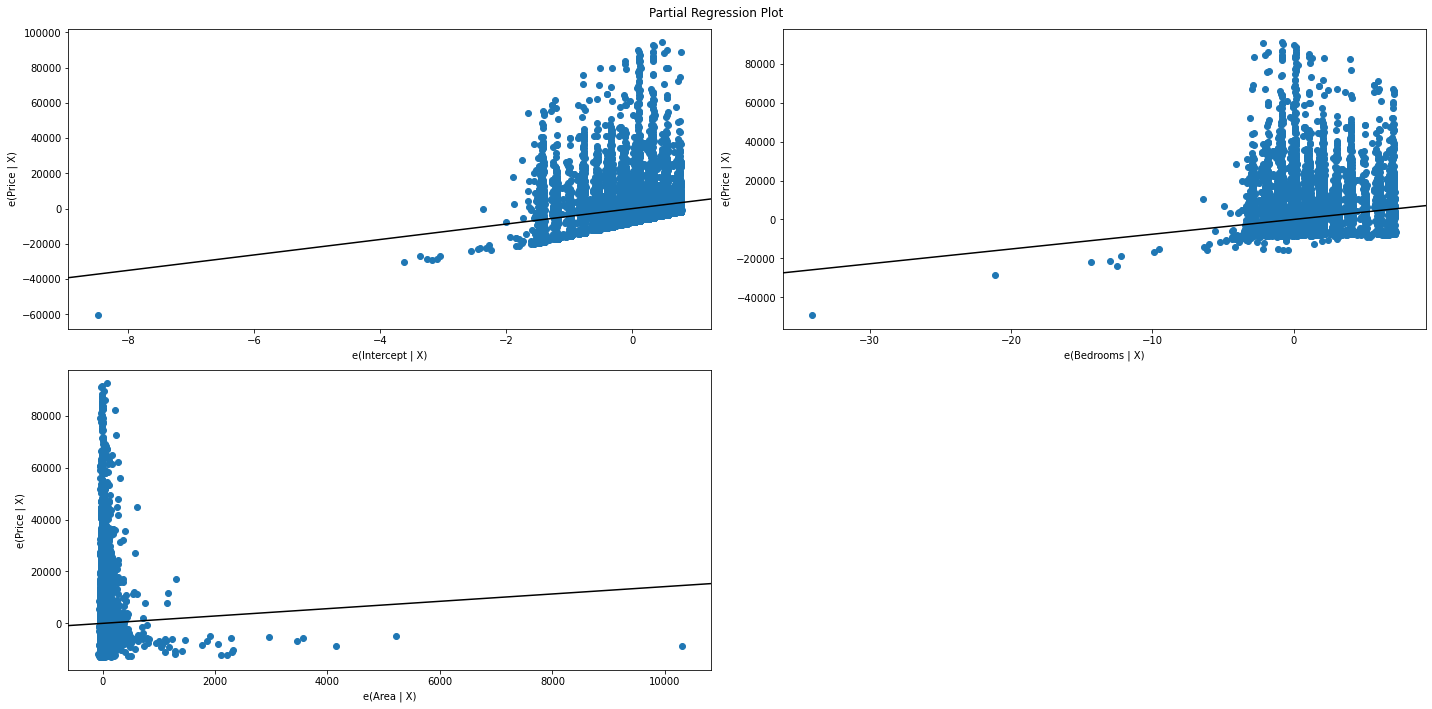

In [30]:
fig = plt.figure(figsize=(20, 10))
sm.graphics.plot_partregress_grid(res, fig=fig)
plt.show()